## Data PreProcessing

In [1]:
import pandas as pd
import json

In [2]:
df = pd.read_csv("BreastCancerChatbotDataset.csv")
df.head()

,Questions,Answers,Patterns,Tags,Source
0,NaN,NaN,NaN,NaN,NaN
1,What is breast cancer?,Breast cancer is a malignant tumor that develo...,What precisely is breast cancer. Define breast...,breast cancer,https://www.medscape.com/answers/1947145-15523...
2,What are the signs and symptoms of breast cancer?,"Early breast cancers may be asymptomatic, and ...",What are the indications of breast cancer. Wha...,signs symptoms,https://www.medscape.com/answers/1947145-15523...
3,What is included in the evaluation of breast c...,Evaluation of breast cancer includes the follo...,What is included in a breast cancer evaluation...,evaluation,https://www.medscape.com/answers/1947145-15524...
4,Which physical findings suggest breast cancer?,The following physical findings should raise c...,Which physical signs point to breast cancer. W...,indicative indicators,https://www.medscape.com/answers/1947145-15524...


In [3]:
df.tail()

,Questions,Answers,Patterns,Tags,Source
183,Which medications in the drug class Calcium Me...,Bisphosphonates are complementary to chemother...,Calcium metabolism modifiers medication usage....,Calcium metabolism modifiers,https://www.medscape.com/answers/1947145-15596...
184,Which medications in the drug class Antineopla...,"Anthracyclines work in multiple ways, includin...",Antineoplastics Anthracycline medication usage...,Anthracycline medications,https://www.medscape.com/answers/1947145-15597...
185,Which medications in the drug class Antineopla...,Alkylating agents constitute one of the earlie...,Antioneplastics Alkylating medication usage. W...,Alkylating medications,https://www.medscape.com/answers/1947145-15597...
186,Which medications in the drug class PD-1/PD-L1...,PD-L1 is expressed on the surface of activated...,PD 1 / PD L1 inhibitors usage. PD-1/PD-L1 medi...,PD-1/PD-L1 PD-1 PD-L1,https://www.medscape.com/answers/1947145-18545...
187,Which medications in the drug class PI3K Inhib...,PI3K inhibitor indicated in combination with f...,PI3K inhibitors usage. When to use PI3K Inhibi...,PI3K,https://www.medscape.com/answers/1947145-18546...


## Drop Null Values

In [3]:
df.dropna(inplace=True)
df.head()

,Questions,Answers,Patterns,Tags,Source
1,What is breast cancer?,Breast cancer is a malignant tumor that develo...,What precisely is breast cancer. Define breast...,breast cancer,https://www.medscape.com/answers/1947145-15523...
2,What are the signs and symptoms of breast cancer?,"Early breast cancers may be asymptomatic, and ...",What are the indications of breast cancer. Wha...,signs symptoms,https://www.medscape.com/answers/1947145-15523...
3,What is included in the evaluation of breast c...,Evaluation of breast cancer includes the follo...,What is included in a breast cancer evaluation...,evaluation,https://www.medscape.com/answers/1947145-15524...
4,Which physical findings suggest breast cancer?,The following physical findings should raise c...,Which physical signs point to breast cancer. W...,indicative indicators,https://www.medscape.com/answers/1947145-15524...
5,What features of a palpable lump suggest breas...,If a palpable lump is found and possesses any ...,what is lump. What characteristics of a palpab...,lump palpable,https://www.medscape.com/answers/1947145-15524...


## Create JSON Intent File

In [4]:
dict_ = {"intents":[]}

dict_
questions = None
for ind in df.index:
    ques = df['Questions'][ind].lower()
    ques = ques.replace('?','.')
    ques += df['Patterns'][ind].lower()
    ques = ques.split('.')
    for i, q in enumerate(ques):
        ques[i] = q.strip()
    ans = df['Answers'][ind] + "For more information " + df['Source'][ind]
    dict1 = {'tags': df['Tags'][ind]}
    dict1['patterns'] = ques[:-1]
    dict1['responses'] = ans
    dict_['intents'].append(dict1)

In [5]:
with open("breastCancer.json", "w") as f:
    f.write(json.dumps(dict_))

In [6]:
dict_["intents"][:2]

[{'tags': 'breast cancer',
  'patterns': ['what is breast cancer',
   'what precisely is breast cancer',
   'define breast cancer',
   'explain breast cancer'],
  'responses': 'Breast cancer is a malignant tumor that develops from the cells of the breast. It is the most common type of cancer among women in the World. It is most often curable when found early.About 80% of breast cancers start in the ducts.For more information https://www.medscape.com/answers/1947145-155238/what-is-breast-cancer'},
 {'tags': 'signs symptoms',
  'patterns': ['what are the signs and symptoms of breast cancer',
   'what are the indications of breast cancer',
   'what are the breast cancer signs and symptoms',
   'what breast cancer symptoms and signs are present'],
  'responses': 'Early breast cancers may be asymptomatic, and pain and discomfort are typically not present. If a lump is discovered, the following may indicate the possible presence of breast cancer:  Change in breast size or shape, Skin dimplin

In [4]:
import random
import json
import pickle
import numpy as np
import pandas as pd

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import metrics

lemmatizer=WordNetLemmatizer()

with open('breastCancer.json') as json_file:
    intents = json.load(json_file)

#print(intents)

words=[]
classes=[]
documents=[]
ignore_letters=['?','!','.',',']

for intent in intents['intents']:
  for pattern in intent['patterns']:
    word_list=nltk.word_tokenize(pattern)
    words.extend(word_list)
    documents.append((word_list,intent['tags']))
    if intent['tags'] not in classes:
      classes.append(intent['tags'])


words =[lemmatizer.lemmatize(word) for word in words if word not in ignore_letters]
words = sorted(set(words))
classes=sorted(set(classes))
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))



training=[]
output_empty=[0]*len(classes)

for document in documents:
  bag=[]
  word_patterns=document[0]
  words = [lemmatizer.lemmatize(word.lower()) for word in words if word and word not in ignore_letters]
  for word in words:
    bag.append(1) if word in word_patterns else bag.append(0)

  output_row=list(output_empty)
  output_row[classes.index(document[1])]=1
  training.append([bag,output_row])

random.shuffle(training)
training=np.array(training)

train_x=list(training[:,0])
train_y=list(training[:,1])

model=Sequential()
model.add(Dense(128,input_shape=(len(train_x[0]),),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(train_y[0]),activation='softmax'))

sgd=SGD(learning_rate=0.0001,decay=1e-6,momentum=0.9,nesterov=True)


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','Precision','Recall'])
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=METRICS)
hist = model.fit(np.array(train_x),np.array(train_y),epochs=50,batch_size=12,verbose=1)
model.save('chatbotmodel.h5', hist)
print('Training Done')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\ahmed\AppData\Local\Temp\ipykernel_1228\2461232925.py:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training=np.array(training)


Epoch 1/50
41/41 [==============================] - 4s 9ms/step - loss: 5.1442 - accuracy: 0.0165 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/50
41/41 [==============================] - 0s 9ms/step - loss: 5.0379 - accuracy: 0.0598 - precision: 0.0000e+00 - recall: 0.0000e+00- ETA: 0s - loss: 5.0731 - accuracy: 0.0357 - precision: 0.0000e+00 - recall: 0.0000e+
Epoch 3/50
41/41 [==============================] - 0s 8ms/step - loss: 4.8262 - accuracy: 0.0825 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/50
41/41 [==============================] - 0s 11ms/step - loss: 4.4998 - accuracy: 0.1072 - precision: 0.7500 - recall: 0.0062
Epoch 5/50
41/41 [==============================] - 0s 9ms/step - loss: 4.0927 - accuracy: 0.2268 - precision: 0.5556 - recall: 0.0103e+0 - ETA: 0s - loss: 4.2517 - accuracy: 0.2381 - precision: 1.0000 - recall: 0.0119       - ETA: 0s - loss: 4.1572 - accuracy: 0.2456 - precision: 1.0000 - recall: 0.
Epoch 6/50
41/41 [=============================

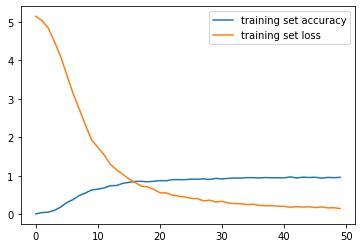

In [2]:
##plotting model accuracy
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],label='training set accuracy')
plt.plot(hist.history['loss'],label='training set loss')
plt.legend()

In [6]:
import nltk
import random
import numpy as np
import json
import pickle
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import load_model
lemmatizer=WordNetLemmatizer()

with open('breastCancer.json') as json_file:
    intents = json.load(json_file)

words=pickle.load(open('words.pkl','rb'))
print(words[:100], len(words))

classes=pickle.load(open('classes.pkl','rb'))
print(classes[:5], len(classes))
model=load_model('chatbotmodel.h5')


def clean_up_sentence(sentence):
  sentence_words=nltk.word_tokenize(sentence)
  sentence_words=[lemmatizer.lemmatize(word) for word in sentence_words]
  return sentence_words

def bag_of_words(sentence):
  sentence_words=clean_up_sentence(sentence)
  bag=[0]*len(words)
  for w in sentence_words:
    for i,word in enumerate(words):
      if word == w:
        bag[i]=1
  return np.array(bag)

def predict_class(sentence):
  bow=bag_of_words(sentence)
  res=model.predict(np.array([bow]))[0]
  ERROR_THRESHOLD=0.25
  results=[[i,r] for i,r in enumerate(res) if r> ERROR_THRESHOLD]
  results.sort(key=lambda x:x[1],reverse=True)
  return_list=[]
  for r in results:
    return_list.append({'intent': classes[r[0]],'probability':str(r[1])})
  return return_list

def get_response(intents_list,intents_json):
    result = None
    tag=intents_list[0]['intent']
    print(intents_list[0])
    list_of_intents=intents_json['intents']
    for i in list_of_intents:
        if tag in i['tags']:
            result=i['responses']
            break
    return result

print("GO! BOT IS RUNNING")

while True:
    message=input("")
    ints=predict_class(message)
    if len(ints) > 0:
        res=get_response(ints,intents)
        print(res)

["'s", '(', ')', '/', '1', '2', '3d', ':', 'a', 'about', 'ac', 'accelerated', 'according', 'acog', 'acp', 'acr', 'adjuvant', 'adjuvent', 'adp-ribose', 'advanced', 'aetiology', 'affect', 'after', 'again', 'age', 'ageing', 'agent', 'ajcc', 'algorithm', 'alkaloid', 'alkylating', 'alnd', 'among', 'an', 'anatomy', 'and', 'another', 'antagonist', 'anthracycline', 'antibody', 'antimetabolite', 'antimicrotubular', 'antineoplastic', 'antioneplastics', 'apply', 'are', 'aromatase', 'aromatese', 'asbrs', 'asc', 'asco', 'asco/cap', 'aspect', 'aspiration', 'assay', 'assessed', 'assessment', 'associated', 'association', 'asymptomatic', 'at', 'available', 'axillary', 'based', 'basic', 'be', 'between', 'biomarkers', 'biopsy', 'bone', 'brca-related', 'breast', 'breast-conserving', 'bse', 'by', 'calcium', 'can', 'cancer', 'cancer-prone', 'carcinoma', 'cardiovascular', 'care', 'carried', 'categorized', 'category', 'cause', 'cdk', 'chance', 'characteristic', 'characterized', 'chemotherapy', 'class', 'class

KeyboardInterrupt: Interrupted by user

In [23]:
def minDis(s1, s2, n, m, dp) :
                  
  if(n == 0) :
      return m       
  if(m == 0) :
      return n
                    
  if(dp[n][m] != -1)  :
      return dp[n][m];
                     
  if(s1[n - 1] == s2[m - 1]) :          
    if(dp[n - 1][m - 1] == -1) :
        dp[n][m] = minDis(s1, s2, n - 1, m - 1, dp)
        return dp[n][m]                  
    else :
        dp[n][m] = dp[n - 1][m - 1]
        return dp[n][m]
                
  else :           
    if(dp[n - 1][m] != -1) :  
      m1 = dp[n - 1][m]     
    else :
      m1 = minDis(s1, s2, n - 1, m, dp)
              
    if(dp[n][m - 1] != -1) :               
      m2 = dp[n][m - 1]           
    else :
      m2 = minDis(s1, s2, n, m - 1, dp)  
    if(dp[n - 1][m - 1] != -1) :   
      m3 = dp[n - 1][m - 1]   
    else :
      m3 = minDis(s1, s2, n - 1, m - 1, dp)
     
    dp[n][m] = 1 + min(m1, min(m2, m3))
    return dp[n][m]

print(len(words))

text = "wht is brest chnce hert diseaes"
for nn in text:
    jj = 10
    ids = ""
    for w in words:
        n = len(nn)
        m = len(w)
        dp = [[-1 for i in range(m + 1)] for j in range(n + 1)]
        ii = minDis(nn, w, n, m, dp)
        if jj > ii:
            jj = ii
            ids = w
    print(ids, jj)

451
( 1
( 1
( 1
( 1
i 0
's 1
( 1
( 1
( 1
( 1
's 1
( 1
( 1
( 1
( 1
( 1
( 1
( 1
( 1
( 1
( 1
( 1
( 1
( 1
( 1
i 0
's 1
( 1
a 0
( 1
's 1
